In [1]:
import string
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)

In [2]:
#pd.Series and pd.DataFrame: have a polot attribute for making basic plots
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s

0    -0.011862
10    1.393728
20    2.083346
30    2.214103
40    2.534706
50    3.474939
60    3.661116
70    2.209733
80    0.144913
90   -0.046191
dtype: float64

<AxesSubplot:>

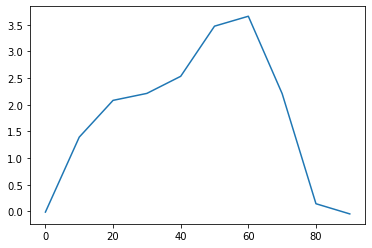

In [3]:
s.plot()

In [4]:
#plot options
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s

0     2.259163
10    3.236957
20    4.204613
30    3.384062
40    4.060202
50    4.969568
60    6.066895
70    4.829365
80    4.391084
90    3.270529
dtype: float64

<AxesSubplot:title={'center':'My first plot using a Series.'}>

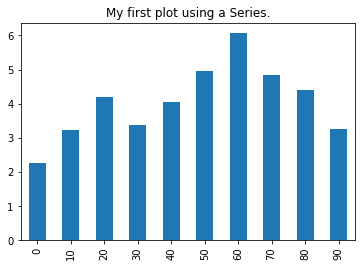

In [5]:
s.plot(kind='bar', use_index=True, title='My first plot using a Series.')

In [6]:
#a DataFrame's plot method creates a line plot with different columns representing each line
#The plot method creates legends automatically.
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.605742,0.272868,1.577862,0.756070
10,0.314107,-1.618649,2.611999,1.622756
20,0.626572,-2.164937,2.977570,2.568133
30,1.054318,-2.906150,2.124430,3.382697
40,1.151869,-2.632015,2.422973,2.821261
50,-1.034910,-1.632663,3.753757,2.982197
60,-1.767857,-0.771469,2.037396,4.122608
70,-1.623424,-1.808857,1.744873,5.127542
80,-1.139741,-0.343174,2.780428,4.652843
90,-1.360971,-0.561421,1.680287,3.732244


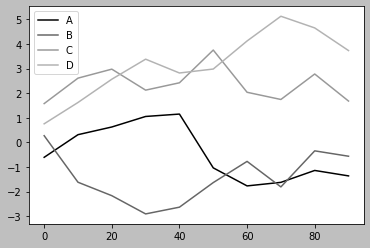

In [7]:
#list(string.ascii_lowercase[:16])
with plt.style.context('grayscale'):
    df.plot();
    #plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
#plt.show()

In [8]:
 #equivalent to df.plot.line

<AxesSubplot:>

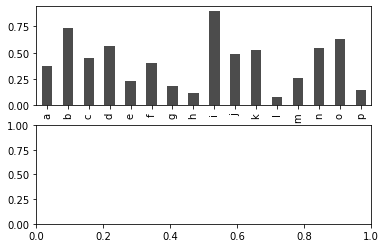

In [9]:
#Bar plots
#plot.bar() and plot.barh() methods
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='black', alpha=0.7)

<AxesSubplot:>

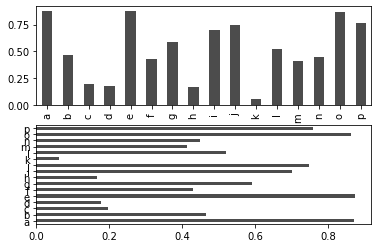

In [10]:
#Bar plots
#plot.bar() and plot.barh() methods
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='black', alpha=0.7)
data.plot.barh(ax=axes[1], color='black', alpha=0.7)

In [11]:
#DataFrame bar plots
#rows are grouped in bars side by side for each value
pd.DataFrame(np.random.uniform(size=(6, 4)))

,0,1,2,3
0,0.209633,0.736860,0.446664,0.069102
1,0.277047,0.786775,0.680561,0.555282
2,0.125315,0.966118,0.658990,0.236417
3,0.548628,0.991468,0.291383,0.275078
4,0.880941,0.762032,0.849741,0.955491
5,0.959008,0.252173,0.627934,0.386913


In [12]:
#DataFrame bar plots
#rows are grouped in bars side by side for each value
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
            index=['one', 'two', 'three', 'four', 'five', 'six'],
            columns=pd.Index(['A', 'B', 'C', 'D'],
            name='Genus'))

In [13]:
df

Genus,A,B,C,D
one,0.525192,0.403917,0.262503,0.869453
two,0.177162,0.454568,0.551102,0.941361
three,0.470170,0.924553,0.941585,0.824972
four,0.321382,0.744258,0.658472,0.165439
five,0.026984,0.497436,0.591358,0.199740
six,0.130606,0.693952,0.213143,0.888288


<AxesSubplot:>

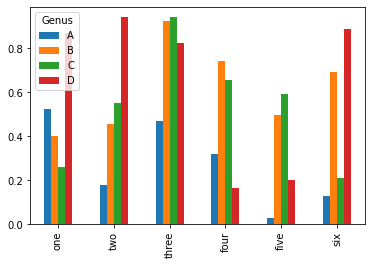

In [14]:
df.plot.bar()

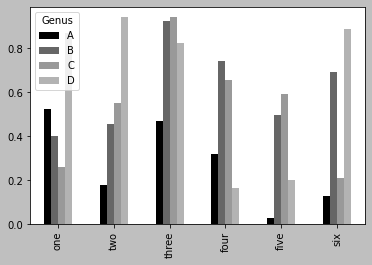

In [15]:
#let's make it grayscale
with plt.style.context('grayscale'):
    df.plot.bar();

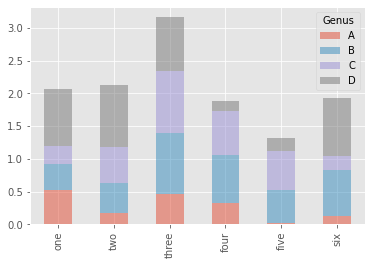

In [16]:
#stacked=True creates a stacked bar chart
with plt.style.context('ggplot'):
    df.plot.bar(stacked=True, alpha=0.5)

<AxesSubplot:title={'center':'Customer Age'}>

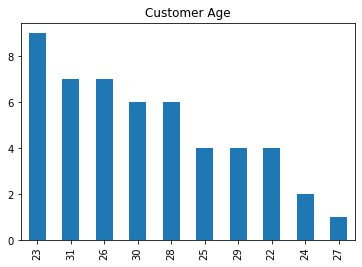

In [17]:
#determine a series value count frequency
#s.value_counts().plot.bar()
s = pd.Series(np.random.randint(22, 32, 50))
s.value_counts().plot.bar(title='Customer Age')

In [18]:
#let's look at the tips dataset
#Objective: Make a stacked bar plot showing the percentage of data points for each party size every day.
tips = pd.read_csv('examples/tips.csv')

In [19]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [20]:
#pd.crosstab: computes a simple frequency table
party_counts = pd.crosstab(tips['day'], tips['size'])

In [21]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [22]:
#call party_counts.reindex to reorder the indices
party_counts = party_counts.reindex(index=['Thur', 'Fri', 'Sat', 'Sun'])

In [23]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [24]:
#since there are not many one or six-person parties we will remove them here
party_counts = party_counts.loc[:, 2:5]

In [25]:
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [26]:
#normalize so each row sums to one, then make the plot
party_pcts = party_counts.div(party_counts.sum(axis='columns'),
                             axis='index')

In [27]:
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<AxesSubplot:xlabel='day'>

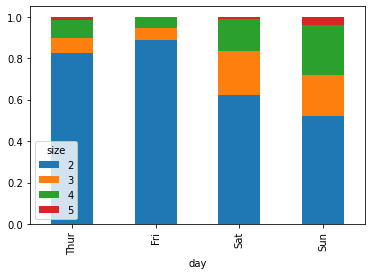

In [28]:
party_pcts.plot.bar(stacked=True)

<AxesSubplot:xlabel='day'>

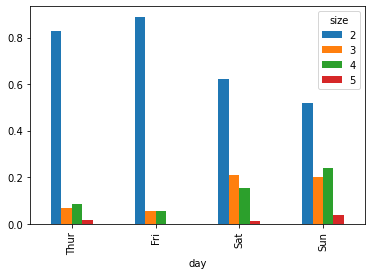

In [29]:
#unstacked version
party_pcts.plot.bar(stacked=False)

In [30]:
#things that require aggregation are easier with Seaborn
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [31]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [32]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

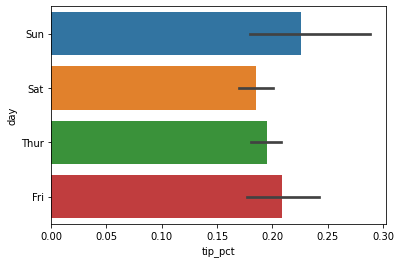

In [33]:
#bar plot
sns.barplot(x='tip_pct', y='day', data=tips)

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

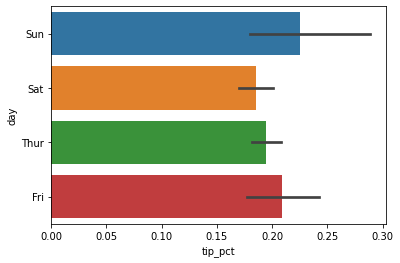

In [34]:
#bar plot
#same as above, but we specify the orient as "h"
sns.barplot(x='tip_pct', y='day', orient='h', data=tips)

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

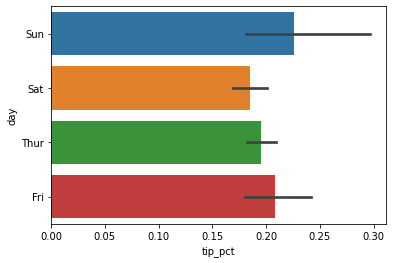

In [35]:
#We can add additional categorical variable that lets us see if its lunch or dinner
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<AxesSubplot:ylabel='Frequency'>

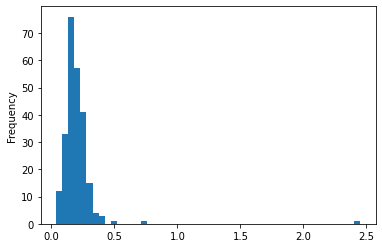

In [36]:
#histograms/density plots: a histogram is a bar plot focused on value frequency
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

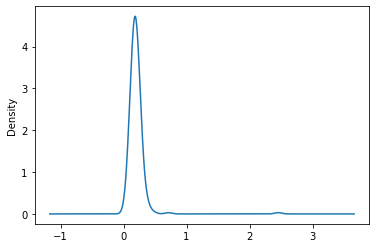

In [37]:
#density plot with same data
tips['tip_pct'].plot.density()

In [38]:
#histplot method: easier histograms and density plots
comp1 = np.random.standard_normal(200)
comp1

array([ 0.06885497, -0.41238522,  0.02637927,  0.29791259,  1.10189105,
        1.22480781, -0.55475899, -1.08597681, -0.5841568 , -0.09090476,
        0.03548122, -0.85412893, -0.61167906,  0.52467508, -0.69567493,
       -0.11178929,  2.31835696,  0.3018153 ,  0.46654827, -0.41847615,
       -2.90255655,  0.74358498, -0.23193364, -0.26199206,  0.74403385,
       -0.85825146, -0.64517396,  1.22950734, -1.04902189, -1.59895092,
        0.69448446, -1.80722549,  0.31103081,  0.38011033,  0.12321582,
       -0.74064055, -1.0525447 , -0.98212931, -1.52363827, -0.01627792,
        0.51338262,  1.27242197,  0.50313561,  0.67740439, -0.66284369,
       -0.00857542,  0.47264538,  0.7119439 ,  0.5078704 ,  0.68735022,
       -0.30009931, -0.1657451 , -0.02183476,  0.47870986, -0.07834565,
        0.29198102, -1.40675485, -0.70790978,  0.52401417,  0.97927088,
       -0.0830534 , -0.2266422 ,  2.17261658,  0.05854031,  0.67016196,
       -0.06646157,  0.02252005,  0.67899645,  1.01889353,  0.81

In [39]:
comp2 = 10 + 2 * np.random.standard_normal(200)
comp2

array([ 8.86550879,  8.3304215 ,  8.45414617,  9.34245449,  9.86182401,
       12.2696875 , 10.73034084, 11.0904249 ,  9.73817155,  8.74240357,
        9.33707734, 10.07575917, 12.98480324, 11.86417793,  7.55146281,
        9.11408247, 10.02207435, 11.81974936,  8.82952435,  9.16737819,
        9.99307814,  7.93695709, 14.81093597,  8.77445783,  9.60062246,
        5.87036646, 10.52198614, 12.96599619, 13.00118224,  9.97990675,
        9.99518654, 13.65413549,  7.10826268,  8.48618398, 12.18243915,
        7.96902495,  8.72438143,  9.43335328, 10.15194065, 13.86776577,
        6.57317684,  7.81323051, 11.09135666,  8.21285268,  8.23341052,
       10.12704754,  7.5075134 , 10.71932812, 10.33359144,  9.98793198,
       11.31270604,  8.48919681,  8.37831395,  9.29031331, 11.05959292,
       11.38751228, 10.96156836, 12.54715088, 10.20995365,  8.14546652,
        8.47358973, 11.92779926, 10.97131222, 11.10342663, 11.03345784,
       16.11315182,  8.10753013,  8.48190313, 12.23585522,  8.85

In [40]:
values = pd.Series(np.concatenate([comp1, comp2]))
values

0       0.068855
1      -0.412385
2       0.026379
3       0.297913
4       1.101891
         ...    
395    10.126445
396     9.994803
397     8.480573
398    10.718623
399     9.366072
Length: 400, dtype: float64

<AxesSubplot:ylabel='Count'>

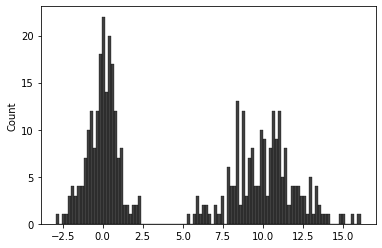

In [41]:
sns.histplot(values, bins=100, color='black')

In [46]:
#scatter/point plots
#point or scatter plots can let us see relationship between two one-dimensional data series
macro = pd.read_csv('examples/macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [52]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [53]:
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [54]:
#compute the log differences
trans_data = np.log(data).diff().dropna()

In [55]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


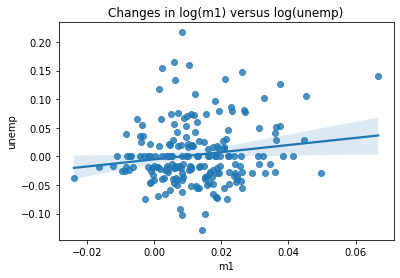

In [58]:
#we can use seaborn regplot method, making a scatter plot and a linear regression line
ax = sns.regplot(x='m1', y='unemp', data=trans_data)
ax.set_title('Changes in log(m1) versus log(unemp)');

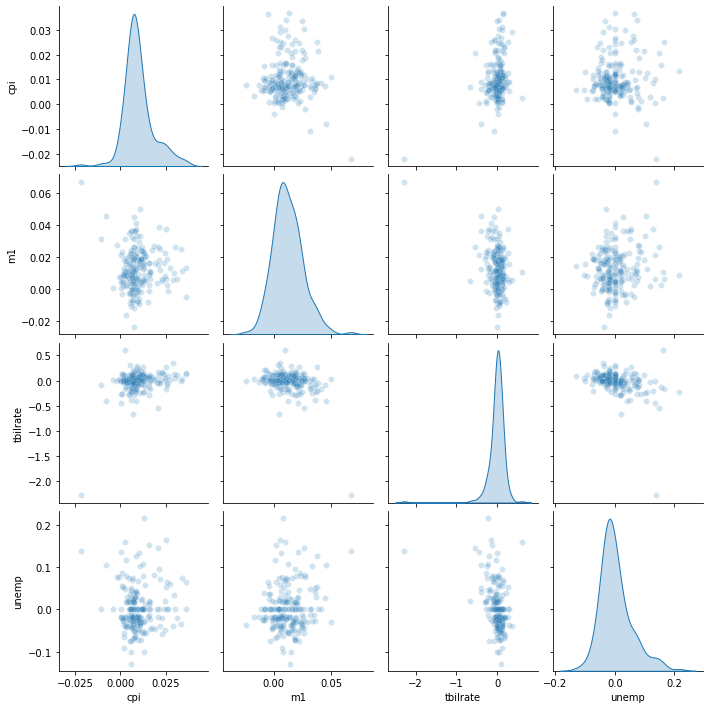

In [59]:
#pairplots use a matrix of scatter plots
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

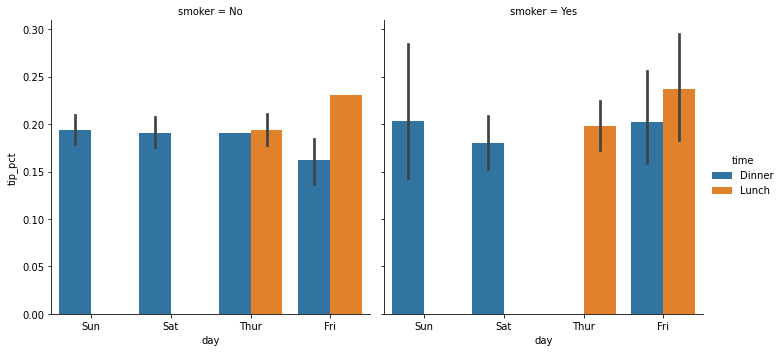

In [61]:
#facet grid: seaborn has a catplot function that makes facet grids easier
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
           kind='bar', data=tips[tips.tip_pct < 1])

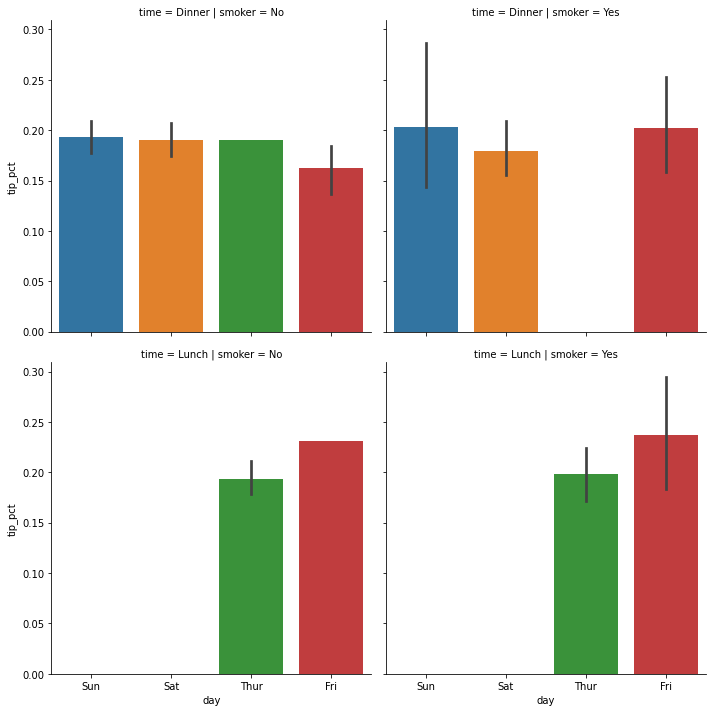

In [62]:
#instead of grouping by time with different bar colors, we can
#expand the facet grid by adding one row per time value
sns.catplot(x='day', y='tip_pct', row='time',
           col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

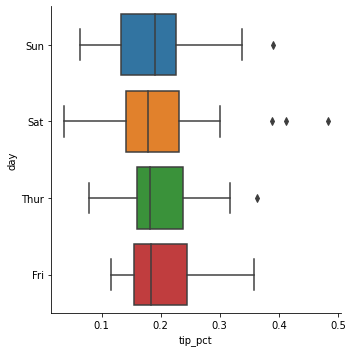

In [63]:
#additional catplot types: boxplots
sns.catplot(x='tip_pct', y='day', kind='box',
           data=tips[tips.tip_pct < 0.5])